In [59]:
from pharynx_analysis import (pharynx_io as pio, image_processing as ip, experiment, plots)
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from importlib import reload
from skimage import measure, transform
from collections import namedtuple
import pdb
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import scale
import skimage
import logging

reload(logging)
reload(experiment)
reload(pio)
reload(ip)
reload(plots)

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

In [60]:
img_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_minimal/2017_02_22-HD233_SAY47-OK/2017_02_22-HD233_SAY47-OK.tif"
strain_map_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_minimal/2017_02_22-HD233_SAY47-OK/2017_02_22-HD233_SAY47-OK-indexer.csv"
imaging_scheme = "TL/470/410/470/410"
strains = pio.load_strain_map_from_disk(strain_map_path)

In [76]:
reload(experiment);
ex = experiment.PairExperiment(
    raw_image_path=img_path,
    imaging_scheme=imaging_scheme,
    strain_map=strains
)

11:26:28 INFO:Starting full pipeline run for /Users/sean/code/wormAnalysis/data/paired_ratio_minimal/2017_02_22-HD233_SAY47-OK/2017_02_22-HD233_SAY47-OK.tif
11:26:28 INFO:Loading Images
11:26:29 INFO:Segmenting pharynxes
11:26:30 INFO:Centering and rotating pharynxes
11:26:38 INFO:Calculating midlines
11:26:40 INFO:Measuring under midlines
11:26:45 INFO:Trimming intensity data
11:26:46 INFO:Calculating redox measurements
/Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
11:26:46 INFO:Finished full pipeline run for /Users/sean/code/wormAnalysis/data/paired_ratio_minimal/2017_02_22-HD233_SAY47-OK/2017_02_22-HD233_SAY47-OK.tif


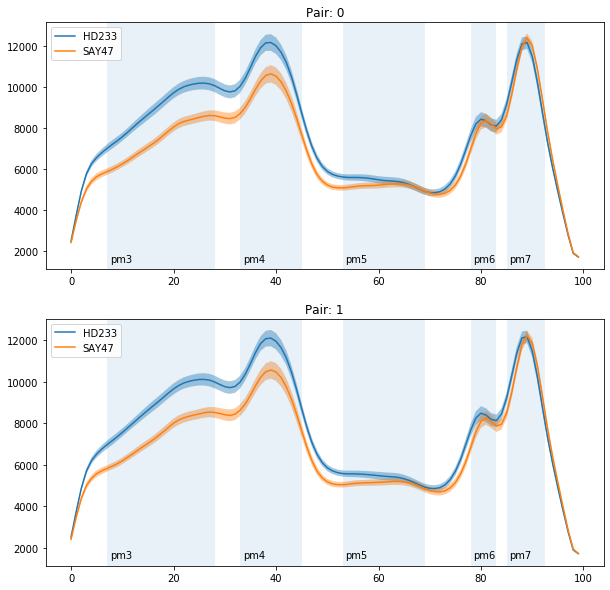

In [129]:
reload(plots)

regions = {
    'pm3': [7,  28],
    'pm4': [33, 45],
    'pm5': [53, 69],
    'pm6': [78, 83],
    'pm7': [85, 92.5],
}

axes = plots.plot_average_by_strain_and_pair(
    ex.trimmed_intensity_data.sel(wavelength='410'),
    regions=regions
)

In [115]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13e4460b8>,
      dtype=object)

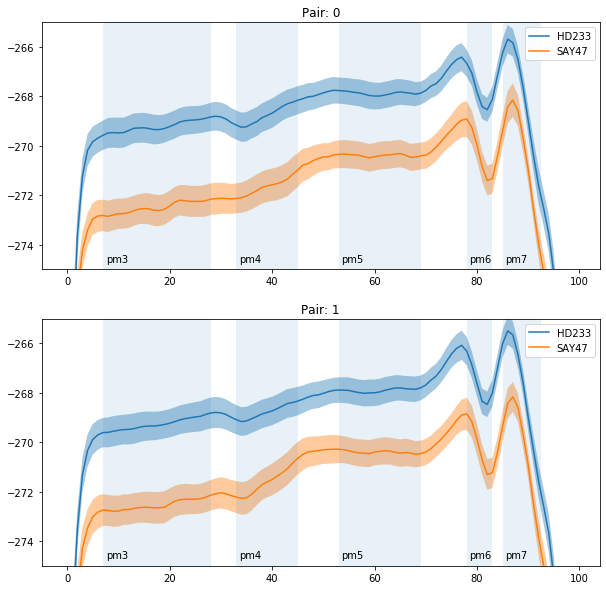

In [111]:
plots.plot_average_by_strain_and_pair(ex.e, regions=regions, ylim=[-275, -265]);

In [128]:
plots.plot_paired_experiment_summary(ex)

AttributeError: module 'pharynx_analysis.plots' has no attribute 'plot_paired_experiment_summary'